In [4]:
import sqlite3

# Create or connect to a new SQLite database (saved in Colab session)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a simple sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
cursor.executemany('''
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
''', [
    ("Apples", 10, 2.5),
    ("Oranges", 20, 1.8),
    ("Bananas", 15, 1.2),
    ("Apples", 5, 2.5),
    ("Bananas", 10, 1.2)
])

conn.commit()
conn.close()
print("✅ Database and data created successfully!")


✅ Database and data created successfully!


In [5]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# Load data into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM sales", conn)
conn.close()

print("📋 Sales Table:")
print(df)

# Calculate total quantity & revenue
df["revenue"] = df["quantity"] * df["price"]
total_quantity = df["quantity"].sum()
total_revenue = df["revenue"].sum()

print("\nTotal Quantity Sold:", total_quantity)
print(f"Total Revenue: ₹{total_revenue:.2f}")


📋 Sales Table:
   id  product  quantity  price
0   1   Apples        10    2.5
1   2  Oranges        20    1.8
2   3  Bananas        15    1.2
3   4   Apples         5    2.5
4   5  Bananas        10    1.2
5   6   Apples        10    2.5
6   7  Oranges        20    1.8
7   8  Bananas        15    1.2
8   9   Apples         5    2.5
9  10  Bananas        10    1.2

Total Quantity Sold: 120
Total Revenue: ₹207.00



📦 Sales Summary by Product:
   product  total_quantity  total_revenue
0   Apples              30           75.0
1  Bananas              50           60.0
2  Oranges              40           72.0


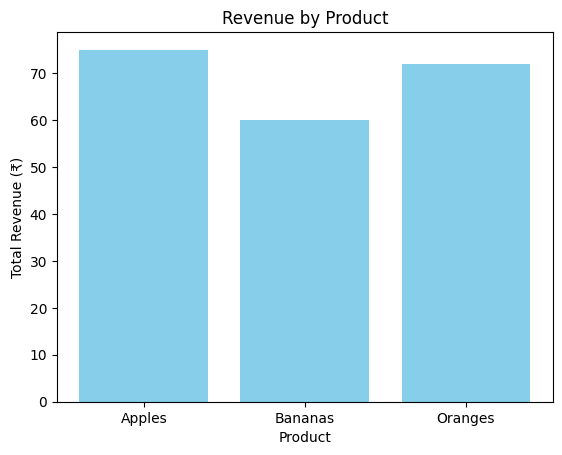

In [6]:
import matplotlib.pyplot as plt

# Group by product
product_summary = df.groupby("product").agg(
    total_quantity=("quantity", "sum"),
    total_revenue=("revenue", "sum")
).reset_index()

print("\n📦 Sales Summary by Product:")
print(product_summary)

# Bar chart
plt.bar(product_summary["product"], product_summary["total_revenue"], color="skyblue")
plt.xlabel("Product")
plt.ylabel("Total Revenue (₹)")
plt.title("Revenue by Product")
plt.show()


In [7]:
product_summary.to_csv("sales_summary.csv", index=False)
print("✅ Sales summary saved as sales_summary.csv")


✅ Sales summary saved as sales_summary.csv


📋 Basic Sales Summary:
   product  total_qty  revenue
0   Apples         45    112.5
1  Bananas         75     90.0
2  Oranges         60    108.0


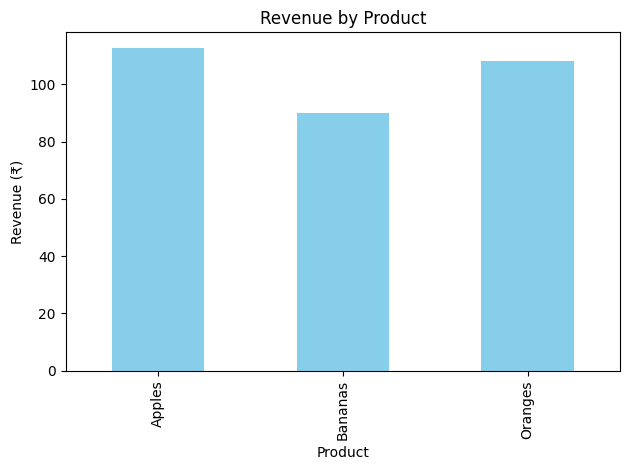

<Figure size 640x480 with 0 Axes>

In [8]:
# ===============================
# TASK 7: Get Basic Sales Summary
# ===============================

# --- Import required libraries ---
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Create (or connect to) a SQLite database ---
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# --- Step 2: Create a 'sales' table and insert sample data ---
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data (if not already added)
cursor.executemany('''
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
''', [
    ("Apples", 10, 2.5),
    ("Oranges", 20, 1.8),
    ("Bananas", 15, 1.2),
    ("Apples", 5, 2.5),
    ("Bananas", 10, 1.2)
])

conn.commit()

# --- Step 3: Run SQL query to summarize sales ---
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# --- Step 4: Display output ---
print("📋 Basic Sales Summary:")
print(df)

# --- Step 5: Plot a simple bar chart ---
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.show()

# --- Optional: Save chart ---
plt.savefig("sales_chart.png")

# --- Close the connection ---
conn.close()
